<a href="https://colab.research.google.com/github/negodinaarina/data_visualisation/blob/main/thitd_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.io as pio
import altair as alt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Для выдвижения и проверки гипотез были выбраны датасеты, в которых содержатся результаты опросов среди определённых групп лиц

# Импортируем и бегло посмотрим на информацию о данных таблицах

In [ ]:
link1 = "/content/drive/MyDrive/survey.csv"
link2 = "/content/drive/MyDrive/responses.csv"
df1 = pd.read_csv(link1)
df2 = pd.read_csv(link2)
responses = pd.read_csv("/content/drive/MyDrive/responses.csv")

In [ ]:
data =[['Timestamp', 'Временная метка'], ['Age', 'Число', 'от 0'], ['Gender', 'Строка', 'м/ж'], ['Country', 'Строка'], ['state', 'Строка'], ['self_employed', 'Строка'], ['family_history', 'Строка', 'Yes/No'], ['treatment', 'Строка', 'Yes/No'], ['work_interfere', 'Строка'], ['no_employees', 'Число'], ['remote_work', 'Строка', 'Yes/No'], ['tech_company', 'Строка', 'Yes/No'], ['benefits','Строка' ,"Yes/No/Maybe/Don't know"], ['care_options', 'Строка', 'Yes/No'], ['wellness_program', 'Строка', "Yes/No/Maybe/Don't know"], ['seek_help', 'Строка', "Yes/No/Maybe/Don't know"], ['anonymity', 'Строка', "Yes/No/Maybe/Don't know"], ['leave', 'Строка'], ['mental_health_consequence', 'Строка', "Yes/No/Maybe/Don't know"], ['phys_health_consequence', 'Строка', "Yes/No/Maybe/Don't know"], ['coworkers', 'Строка', "Yes/No/Maybe/Don't know"], ['supervisor', 'Строка', "Yes/No/Maybe/Don't know"], ['mental_health_interview', 'Строка', "Yes/No/Maybe/Don't know"], ['phys_health_interview', 'Строка', "Yes/No/Maybe/Don't know"], ['mental_vs_physical', 'Строка', "Yes/No/Maybe/Don't know"], ['obs_consequence', 'Строка', "Yes/No/Maybe/Don't know"], ['comments', 'Строка']]
df1_columns = pd.DataFrame(data, columns=['Признак', 'Тип данных', 'Шкала'])

In [ ]:
df1_columns

,Признак,Тип данных,Шкала
0,Timestamp,Временная метка,None
1,Age,Число,от 0
2,Gender,Строка,м/ж
3,Country,Строка,None
4,state,Строка,None
5,self_employed,Строка,None
6,family_history,Строка,Yes/No
7,treatment,Строка,Yes/No
8,work_interfere,Строка,None
9,no_employees,Число,None


In [ ]:
data = [['MUSIC PREFERENCES', 'I enjoy listening to music., I prefer., Dance, Disco, Funk., Folk music., Country., Classical., Musicals., Pop., Rock., Metal, Hard rock., Punk., Hip hop, Rap., Reggae, Ska., Swing, Jazz., Rock n Roll., Alternative music., Latin., Techno, Trance., Opera.', 'Число','от 1 до 5'], 
        ['MOVIE PREFERENCES', 'I really enjoy watching movies., Horror movies., Thriller movies., Comedies., Romantic movies., Sci-fi movies., War movies., Tales., Cartoons., Documentaries., Western movies, Action movies','Число', 'от 1 до 5'],
        ['HOBBIES & INTERESTS', 'History., Psychology., Politics., Mathematics., Physics., Internet., PC Software, Hardware., Economy, Management., Biology., Chemistry., Poetry reading., Geography., Foreign languages., Medicine., Law., Cars., Art., Religion., Outdoor activities., Dancing., Playing musical instruments., Poetry writing., Sport and leisure activities., Sport at competitive level., Gardening., Celebrity lifestyle., Shopping., Science and technology., Theatre., Socializing., Adrenaline sports., Pets.', 'Число',"от 1 до 5"],
        ['PHOBIAS', 'Flying., Thunder, lightning., Darkness., Heights., Spiders., Snakes., Rats, mice., Ageing., Dangerous dogs., Public speaking.', 'Число',"от 1 до 5"],
        ['HEALTH HABITS', 'Smoking habits., Drinking., I live a very healthy lifestyle.','Число', "от 1 до 5"],
        ['PERSONALITY TRAITS, VIEWS ON LIFE & OPINIONS', "I take notice of what goes on around me., I try to do tasks as soon as possible and not leave them until last minute., I always make a list so I don't forget anything., I often study or work even in my spare time., I look at things from all different angles before I go ahead., I believe that bad people will suffer one day and good people will be rewarded., I am reliable at work and always complete all tasks given to me., I always keep my promises., I can fall for someone very quickly and then completely lose interest., I would rather have lots of friends than lots of money., I always try to be the funniest one., I can be two faced sometimes., I damaged things in the past when angry., I take my time to make decisions., I always try to vote in elections., I often think about and regret the decisions I make., I can tell if people listen to me or not when I talk to them., I am a hypochondriac., I am emphatetic person., I eat because I have to. I don't enjoy food and eat as fast as I can., I try to give as much as I can to other people at Christmas., I don't like seeing animals suffering., I look after things I have borrowed from others., I feel lonely in life., I used to cheat at school., I worry about my health., I wish I could change the past because of the things I have done., I believe in God., I always have good dreams., I always give to charity., I have lots of friends., Timekeeping., Do you lie to others?, I am very patient., I can quickly adapt to a new environment., My moods change quickly., I am well mannered and I look after my appearance., I enjoy meeting new people., I always let other people know about my achievements., I think carefully before answering any important letters., I enjoy childrens' company., I am not afraid to give my opinion if I feel strongly about something., I can get angry very easily., I always make sure I connect with the right people., I have to be well prepared before public speaking., I will find a fault in myself if people don't like me., I cry when I feel down or things don't go the right way., I am 100% happy with my life., I am always full of life and energy., I prefer big dangerous dogs to smaller, calmer dogs., I believe all my personality traits are positive., If I find something the doesn't belong to me I will hand it in., I find it very difficult to get up in the morning., I have many different hobbies and interests., I always listen to my parents' advice., I enjoy taking part in surveys., How much time do you spend online?",'Число', 'от 1 до 5'],
        ['SPENDING HABITS', 'I save all the money I can., I enjoy going to large shopping centres., I prefer branded clothing to non branded., I spend a lot of money on partying and socializing., I spend a lot of money on my appearance., I spend a lot of money on gadgets., I will hapilly pay more money for good, quality or healthy food.', 'Число','от 1 до 5'],
        ['DEMOGRAPHICS', 'Age, Height, Weight, How many siblings do you have?, Gender, I am, Highest education achieved, I am the only child, I spent most of my childhood in a, I lived most of my childhood in a','Число/Число/Число/Строка', 'integer, integer, integer, integer, Female - Male, Left handed - Right handed, Currently a Primary school pupil - Primary school - Secondary school - College/Bachelor degree, No - Yes, City - village, house/bungalow - block of flats']]
df2_columns = pd.DataFrame(data, columns=['Группа признаков', 'Признаки', 'Тип данных', 'Шкала'])

In [ ]:
df2_columns

,Группа признаков,Признаки,Тип данных,Шкала
0,MUSIC PREFERENCES,"I enjoy listening to music., I prefer., Dance,...",Число,от 1 до 5
1,MOVIE PREFERENCES,"I really enjoy watching movies., Horror movies...",Число,от 1 до 5
2,HOBBIES & INTERESTS,"History., Psychology., Politics., Mathematics....",Число,от 1 до 5
3,PHOBIAS,"Flying., Thunder, lightning., Darkness., Heigh...",Число,от 1 до 5
4,HEALTH HABITS,"Smoking habits., Drinking., I live a very heal...",Число,от 1 до 5
5,"PERSONALITY TRAITS, VIEWS ON LIFE & OPINIONS","I take notice of what goes on around me., I tr...",Число,от 1 до 5
6,SPENDING HABITS,"I save all the money I can., I enjoy going to ...",Число,от 1 до 5
7,DEMOGRAPHICS,"Age, Height, Weight, How many siblings do you ...",Число/Число/Число/Строка,"integer, integer, integer, integer, Female - M..."


In [ ]:
print(f'Количество строк в первом датасете: {df1.shape[0]}')
print(f'Количество столбцов в первом датасете: {df1.shape[1]}')
print(f'Количество строк во втором датасете: {df2.shape[0]}')
print(f'Количество столбцов во втором датасете: {df2.shape[1]}')

Количество строк в первом датасете: 1259
Количество столбцов в первом датасете: 27
Количество строк во втором датасете: 1010
Количество столбцов во втором датасете: 150


В целом, обработка данных опроса молодежи об их интересах может быть полезной для любой организации, которая хочет лучше понимать потребности и интересы молодежи. Например, он может помочь компаниям более эффективно разрабатывать и продавать продукты и услуги, соответствующие их потребностям.

Данный датасет не походит для исследований, связанных с другими возрастными группами. 
Для исследования интересов людей другого возраста, датасет, собранный только среди молодежи, может не дать полной картины.


Во втором датасете достаточно много признаков, а также групп признаков для выдвижения большого количества гипотез. \\
Поэтому выбираем для анализа второй датасет.

Разделим датасет на группы 

In [ ]:
music_datas = df2.loc[:,"Music":"Opera"]
movie_datas = df2.loc[:,"Movies":"Action"]
hobbie_and_interests_datas = df2.loc[:,"History":"Pets"]
phobia_datas = df2.loc[:,"Flying":"Fear of public speaking"]
health_habit_datas = df2.loc[:,"Smoking":"Healthy eating"]
personal_opinion_datas = df2.loc[:,"Daily events":"Branded clothing"]
spending_habit_datas = df2.loc[:,"Entertainment spending":"Spending on healthy eating"]
demographic_datas = df2.loc[:,"Age":]

Список гипотез: \\
1. Люди с вредными привычками предпочитают слушать агрессивную/громкую музыку.
2. Левши чаще занимаются физикой.
3. Люди, живущие в деревнях, имеют более высокий ИМТ чем люди, живущие в городе.
4. Ребёнок без братьев и сестёр чаще тратит деньги на развлечения.
5. Городские жители чаще принимают участие в выборах.
6. Магистры тратят меньше на развлечения, чем школьники
7. Дети чувствуют себя менее одинокими если у них есть братья/сёстры.
8. Чем старше человек, тем у него меньше друзей.
9. Люди, прожившие большую часть жизни в городе, испытывают проблемы с пробуждением
10.  Люди, увлекающиеся животными(хобби) меньше боятся собак, змей, пауков и крыс.
11.  Более молодые опрошенные больше проводят времени в интернете.
12. Женщины больше боятся высказывать свое мнение, чем мужчины.
13. Технари больше боятся публичных выступлений, чем гуманитарии.
14. Подростки больше подвержены перепадам настроения.
15. У мужчин и женщин сильно различаются хобби.
16.  Религиозные люди меньше курят.

# 1. Люди с вредными привычками предпочитают слушать агрессивную/громкую музыку.

In [ ]:
X = df2[['Smoking', 'Alcohol']]
Y = df2[['Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Rock n roll']]

In [ ]:
temp_df = X.join(Y)
temp_df['Loud music'] = Y.mean(axis=1)
alco_guys = temp_df[
    (temp_df['Alcohol'] == 'drink a lot') |
    (temp_df['Alcohol'] == 'social drinker')
] 
non_alco_guys = temp_df[
    temp_df['Alcohol'] == 'never'
]
smoke_guys = temp_df[
    (temp_df['Smoking'] == 'tried smoking') |
    (temp_df['Smoking'] == 'former smoker') |
    (temp_df['Smoking'] == 'current smoker')
] 
non_smoke_guys = temp_df[
    temp_df['Smoking'] == 'never smoked'
]

In [ ]:
bad_guys = alco_guys['Loud music'].mean() + smoke_guys['Loud music'].mean()
good_guys = non_alco_guys['Loud music'].mean() + non_smoke_guys['Loud music'].mean()

In [ ]:
test_df = pd.DataFrame(
    {
        'Bad guys': bad_guys,
        'Good guys': good_guys
    },
    index = [1]
)

<Axes: >

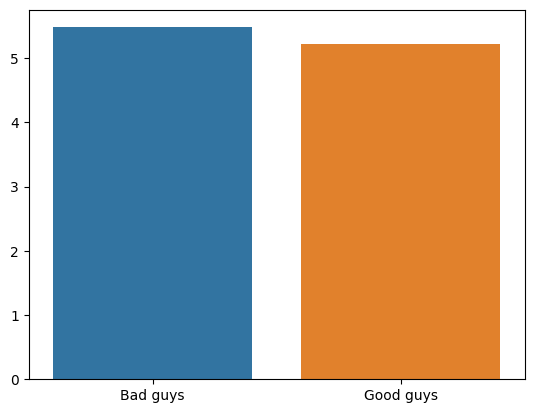

In [ ]:
sns.barplot(test_df)

In [ ]:
print(f'Люди с вредными привычками на {(bad_guys - good_guys)/good_guys*100} % чаще слушают громкую музыку')

Люди с вредными привычками на 4.957787181490436 % чаще слушают громкую музыку


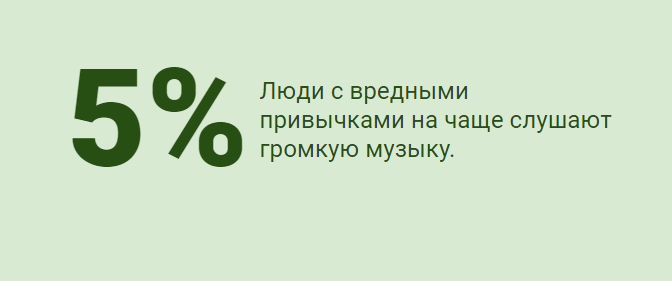

**Вывод:** Гипотеза подтвердилась, люди, имеющие вредные привычки, предпочитают слушать агрессивную/громкую музыку, хотя разница не такая и большая (примерно 5%). 




# 2. Левши чаще занимаются физикой

In [ ]:
hob_dem = pd.concat([hobbie_and_interests_datas, demographic_datas["Left - right handed"]], axis = 1)
interests = list(hobbie_and_interests_datas.columns)

In [ ]:
right = []
left = []
for each in interests:
    a = hob_dem[each][hob_dem["Left - right handed"] == "right handed"].reset_index(drop=True)
    b = hob_dem[each][hob_dem["Left - right handed"] == "left handed"].reset_index(drop=True)
    right_ratio = round(a.mean(), 2)
    left_ratio = round(b.mean(), 2)
    right.append(right_ratio)
    left.append(left_ratio)

In [ ]:
counter2 = 0
listt = []
for each in right:
    var1  = each - left[counter2]
    counter2 += 1
    var1 = round(var1,2)
    listt.append(var1)

dictt =  {"hobbies": interests, "distinction": listt}
data_dicc = pd.DataFrame(dictt)

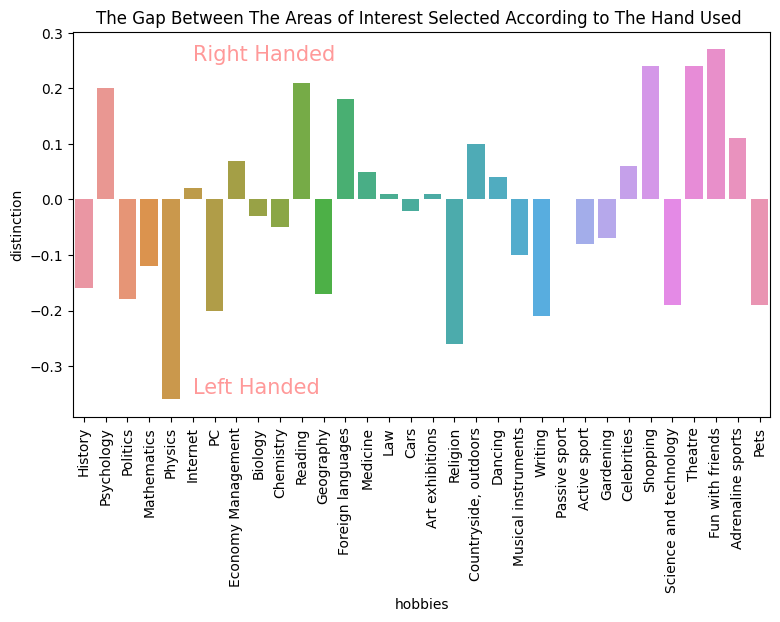

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(data = data_dicc , x = "hobbies", y = "distinction")
plt.xticks(rotation = 90 )
plt.text(5, 0.25, "Right Handed", color = "red", alpha = 0.4, fontsize = 15)
plt.text(5,-0.35, "Left Handed",color = "red", alpha = 0.4, fontsize = 15)
plt.title("The Gap Between The Areas of Interest Selected According to The Hand Used ")
plt.show()

**Вывод:** гипотеза подтвердилась - левши гораздо чаще, чем правши, занимаются физикой. Использовалась столбчатая диаграмма библиотеки seaborn.


# 3. Люди, живущие в деревнях, имеют более высокий ИМТ чем люди, живующие в городе

In [ ]:
young = df2.copy()

In [ ]:
var_of_interest = 'Village - town'
mapping = {var_of_interest: {'city': 0, 'village': 1}}
young.dropna(subset=[var_of_interest], inplace=True)

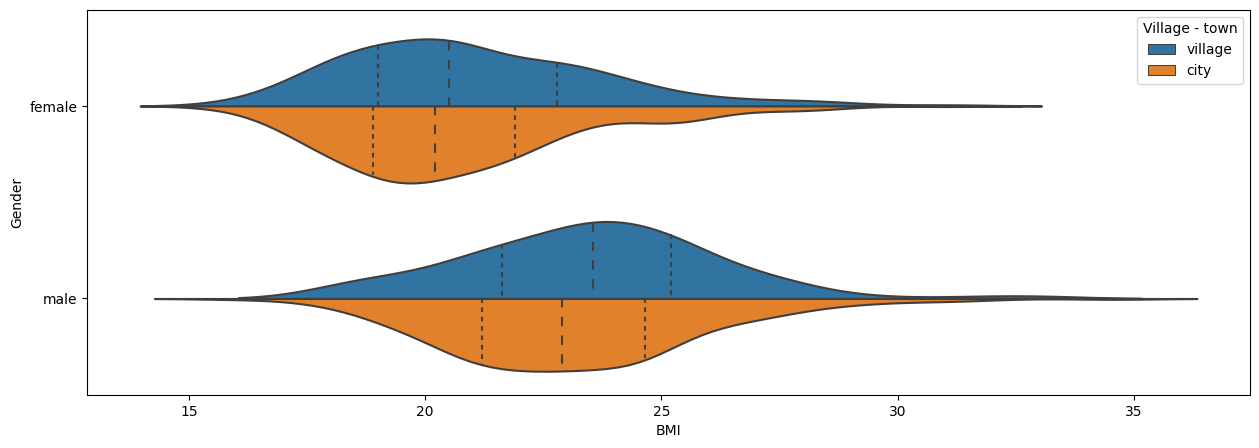

In [ ]:
young['BMI'] = round(young['Weight']/((young['Height']/100)**2),1)
young = young.loc[young['BMI'] <= 35]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
data = young.dropna(subset=['BMI'])
sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data, 
               split=True, inner='quartile', ax=ax);

**Вывод:** гипотеза подтвердилась. Люди, проживающие в деревне, имеют более высокий ИМТ. Для визуализации использовалась библиотека seaborn, скрипичный график.

# 4. Ребёнок без братьев и сестёр чаще тратит деньги на развлечения

In [ ]:
like = {}
for i in spending_habit_datas.columns:
    df_temp = demographic_datas[spending_habit_datas[i]>=4]
    like[i] = df_temp

<Axes: title={'center': 'Only child No/Yes'}>

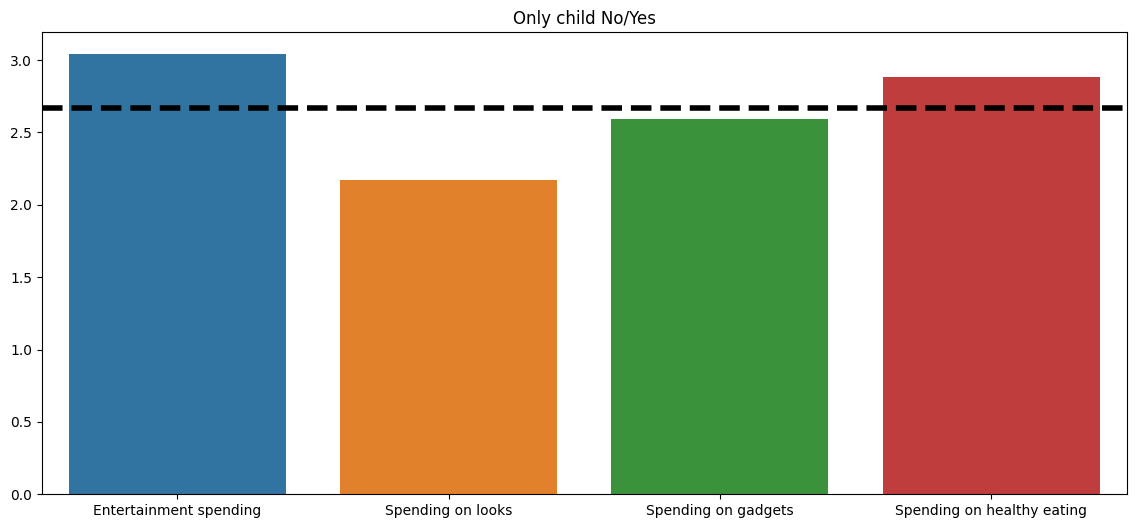

In [ ]:
temp = []
for i in spending_habit_datas.columns:
    temp.append(like[i].groupby('Only child').count()['Age'][0]/
                like[i].groupby('Only child').count()['Age'][1])
plt.figure(figsize=(14,6))
plt.title('Only child No/Yes')
plt.axhline(y=np.mean(temp), color='k', lw=4, ls='dashed')
sns.barplot(x = spending_habit_datas.columns, y = temp)

**Вывод:** гипотеза верна. Единственный ребенок в семье тратит больше денег на развлечения. Для визуализации использована столбчатая диаграмма

# 5. Городские жители чаще, чем деревенские, принимают участие в выборах

In [ ]:
X = demographic_datas[['Village - town']]
Y = personal_opinion_datas[['Elections']]
test = X.join(Y)
res = test.groupby('Village - town').mean()
first = res.iloc[0, 0]
second = res.iloc[1, 0]
print(f"Городские жители на {round((first - second)/second*100, 2)} % чаще принимают участие в выборах")

Городские жители на 2.0 % чаще принимают участие в выборах


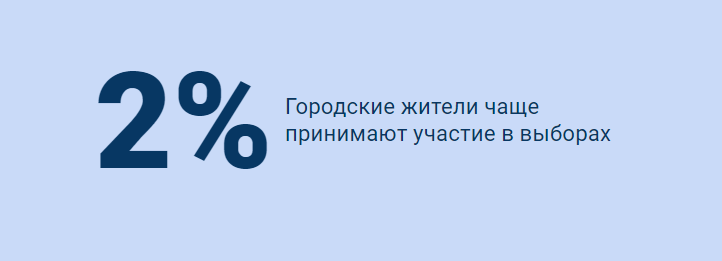

**Вывод:** Гипотеза подтвердилась. Городские жители чаще принимают участие в выборах (на 2%).

# 6. Магистры тратят меньше на развлечения, чем ученики школы

In [ ]:
X = spending_habit_datas
Y = demographic_datas[['Education']]
data = X.join(Y)

In [ ]:
spending_list = list(X.columns)

In [ ]:
hobbies_ratio1 = []
for spend in spending_list:
  l = data[spend][data["Education"] == "primary school"].reset_index(drop=True)
  ratio1 = round(l.mean(), 2)
  hobbies_ratio1.append(ratio1)

d1 = {"spending": spending_list, "Primary school": hobbies_ratio1}
prim_school = pd.DataFrame(d1)


hobbies_ratio2 = []
for spend in spending_list:
  l = data[spend][data["Education"] == "masters degree"]
  ratio2 = round(l.mean(), 2)
  hobbies_ratio2.append(ratio2)

d2 = {"spending": spending_list, "Masters degree": hobbies_ratio2}
master = pd.DataFrame(d2)

In [ ]:
df = pd.concat([master, prim_school['Primary school']], axis=1)
fig = px.bar(df, y=[df['Primary school'], df['Masters degree']], x=spending_list, barmode='overlay')
pio.show(fig)

**Вывод:** гипотеза подтвердилась. Магистры тратят меньше денег на развлечения, чем ученики начальной школы. Для визуализации использовали столбчатую диаграмму с наложением.

# 7. Дети чувствуют себя менее одинокими, если у них есть братья/сёстры

In [ ]:
Y = personal_opinion_datas[['Loneliness']]
X = demographic_datas[['Number of siblings']] 
test_df = X.join(Y)

In [ ]:
result = pd.DataFrame(test_df.groupby('Number of siblings')['Loneliness'].mean()).reset_index()

In [ ]:
fig = px.line(result, x=result['Number of siblings'], y=result['Loneliness'])
fig.show()

**Вывод:** гипотеза не подтвердилась. Дети, являющиеся единственными в семье, испытывают чувство одиночества примерно так же, как и дети, у которых от 1 до 6 братьев и сестер. С увеличением числа братьев и сестер чувство одиночества увеличивается.


# 8. Чем старше человек, тем у него меньше друзей

In [ ]:
Y = personal_opinion_datas[['Number of friends']]
X = demographic_datas[['Age']] 
test_df = X.join(Y)

In [ ]:
result = pd.DataFrame(test_df.groupby('Age')['Number of friends'].mean()).reset_index()

In [ ]:
alt.Chart(result).mark_line().encode(
x='Age',
y='Number of friends'
).properties(
width=800,
height=300,
title='Age vs. Number of friends'
).interactive()

alt.Chart(...)

**Вывод:** гипотеза не подтвердилась. График указывает на то, что в 15 лет люди в среднем имеют меньше друзей, чем в 16, 17, ... , 30 лет

# 9. Люди, прожившие большую часть жизни в городе, испытывают проблемы с пробуждением

In [ ]:
Y = personal_opinion_datas[['Getting up']]
X = demographic_datas[['House - block of flats']] 
test_df = X.join(Y)

In [ ]:
result = test_df.groupby('House - block of flats')['Getting up'].mean().reset_index()

In [ ]:
alt.Chart(result).mark_bar().encode(
x='House - block of flats',
y='Getting up'
).properties(
width=350,
height=300
).interactive()

alt.Chart(...)

**Вывод:** гипотеза подтвердилась. Из столбчатой диаграммы видно, что люди, проживающие в многоквартирных домах, больше согласны с тем, что хуже просыпаются по утрам

# 10. Люди, увлекающиеся животными (хобби), меньше боятся собак, змей, пауков и крыс.

In [ ]:
animal_hobbie = responses[["Pets", "Rats", "Spiders", "Snakes", "Dangerous dogs"]]
animal_hobbie.loc[animal_hobbie["Pets"] == 1, "Pets"] = 0
animal_hobbie.loc[animal_hobbie["Pets"] == 2, "Pets"] = 0
animal_hobbie.loc[animal_hobbie["Pets"] == 3, "Pets"] = 0
animal_hobbie.loc[animal_hobbie["Pets"] == 4, "Pets"] = 1
animal_hobbie.loc[animal_hobbie["Pets"] == 5, "Pets"] = 1
animal_hobbie

In [ ]:
fear_list = list(animal_hobbie.columns.values)[1:]
for i in fear_list:
    animal_hobbie[i].fillna(0.0,inplace = True)

In [ ]:
fear_ratio1 = []
for fear in fear_list:
  l = animal_hobbie[fear][animal_hobbie["Pets"]==1]
  ratio1 = round(sum(l)/len(l), 2)
  fear_ratio1.append(ratio1)

d1 = {"fears": fear_list, "average": fear_ratio1}
pets_admires = pd.DataFrame(d1)
pets_admires

,fears,average
0,Rats,2.44
1,Spiders,2.95
2,Snakes,3.10
3,Dangerous dogs,2.96


In [ ]:
fear_ratio2 = []
for fear in fear_list:
  l = animal_hobbie[fear][animal_hobbie["Pets"]==0]
  ratio2 = round(sum(l)/len(l), 2)
  fear_ratio2.append(ratio2)

d2 = {"fears": fear_list, "average": fear_ratio2}
pets_not_admires = pd.DataFrame(d2)
pets_not_admires

,fears,average
0,Rats,2.36
1,Spiders,2.68
2,Snakes,2.95
3,Dangerous dogs,3.13


In [ ]:
counter = 0 
difference = []
for each in fear_ratio1:
    val  = each - fear_ratio2[counter]
    limited_float3 = round(val,2)
    counter = counter + 1
    difference.append(limited_float3)

In [ ]:
dis_dic  = {"fears":fear_list, "difference": difference}
dis_data = pd.DataFrame(dis_dic)
dis_data.head()

,fears,difference
0,Rats,0.08
1,Spiders,0.27
2,Snakes,0.15
3,Dangerous dogs,-0.17


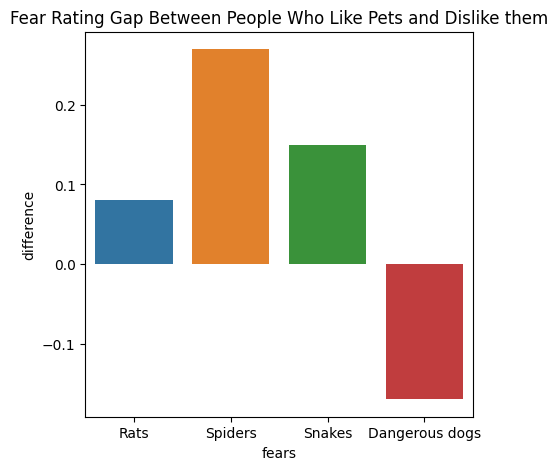

In [ ]:
plt.figure(figsize = (5,5))
ax = sns.barplot(data = dis_data, x = "fears", y="difference")
ax.set_title("Fear Rating Gap Between People Who Like Pets and Dislike them")
plt.show()

**Вывод:** люди, увлекающиеся домашними животными, гораздо меньше боятся собак. Гипотеза отчасти верна.

# 11. Более молодые опрошенные больше проводят времени в интернете.

In [ ]:
df = responses[["Internet usage", "Age"]].value_counts().reset_index()
df["Age group"] = np.nan
df.loc[df["Age"] < 20, "Age group"] = "<20y.o."
df.loc[df["Age"] > 25, "Age group"] = ">25y.o."
df.loc[(df["Age group"].isnull()), "Age group"] = "20 - 25y.o."
df = df.groupby(["Age group", "Internet usage"])[0].sum().reset_index()

In [ ]:
first_group = df[df["Age group"] == "<20y.o."].sum()[0]
second_group = df[df["Age group"] == ">25y.o."].sum()[0]
third_group = df[df["Age group"] == "20 - 25y.o."].sum()[0]


In [ ]:
ratio = []
group_list = {"20 - 25y.o.":third_group, "<20y.o.":first_group, ">25y.o.":second_group}
for key in group_list:
  l = df[df["Age group"]==key]
  for row in l.values:
    ratio1 = round(row[2]/group_list[key], 2)
    ratio.append(ratio1)

ratio = pd.Series(ratio)
df["ratio"] = ratio
df

,Age group,Internet usage,0,ratio
0,20 - 25y.o.,few hours a day,376,0.74
1,20 - 25y.o.,less than an hour a day,59,0.12
2,20 - 25y.o.,most of the day,74,0.15
3,20 - 25y.o.,no time at all,1,0.00
4,<20y.o.,few hours a day,327,0.77
5,<20y.o.,less than an hour a day,62,0.15
6,<20y.o.,most of the day,36,0.08
7,<20y.o.,no time at all,1,0.00
8,>25y.o.,few hours a day,37,0.55
9,>25y.o.,less than an hour a day,17,0.25


In [ ]:
fig = px.sunburst(df, path=['Internet usage', 'Age group'], values="ratio")
fig.show()

**Вывод:** гипотеза не подтвердилась. Гораздо меньше людей, возрастом до 20 лет, проводят большую часть дня в Интернете, чем возрастом от 20 лет. Для визуализации была использована диаграмма солнечные лучи (plotly.express), которая хорошо отображает, какая часть людей и какого возраста проводят много времени в Интернете

# 12. Женщины больше боятся высказывать свое мнение, чем мужчины. 

In [ ]:
gender_assert_data = responses[["Gender", "Assertiveness"]]
gender_assert_data = gender_assert_data.groupby(["Gender"])["Assertiveness"].mean().reset_index()
gender_assert_data

,Gender,Assertiveness
0,female,3.527825
1,male,3.513447


In [ ]:
ratio = (3.527825-3.513447)/3.513447
print(f"У женщин средняя оценка уверенности в высказывании своего мнения на {round(ratio*100, 2)}% выше, чем у мужчин")

У женщин средняя оценка уверенности в высказывании своего мнения на 0.41% выше, чем у мужчин


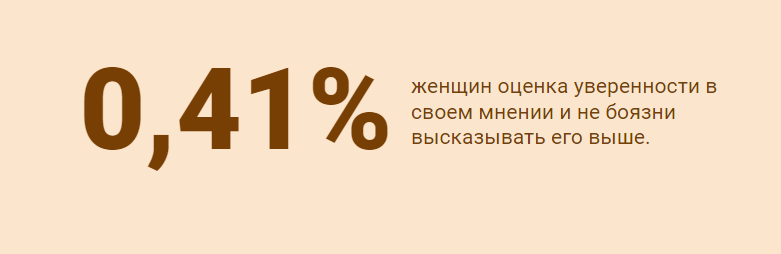

**Вывод:** гипотеза не подтвердилась. В среднем мужчины и женщины одинаково самоуверенны и не боятся высказать свое мнение

# 13. Люди, интересующиеся технической областью, больше боятся публичных выступлений, чем гуманитарии. 

In [ ]:
tg_data = responses[["History", "Psychology", "Politics", "Mathematics", "Physics", "Biology", "Chemistry", "Foreign languages", "Law", "Geography","Fear of public speaking"]]
tg_data["Dominant hobbie"] = tg_data.iloc[:, 0:10].idxmax(axis=1)
tg_data = tg_data.drop(["History", "Psychology", "Politics", "Mathematics", "Physics", "Biology", "Chemistry", "Foreign languages", "Law", "Geography"], axis=1)


In [ ]:
tg_data = tg_data.groupby(["Dominant hobbie"]).mean().reset_index()
tg_data

,Dominant hobbie,Fear of public speaking
0,Biology,2.991379
1,Chemistry,2.750000
2,Foreign languages,2.849462
3,Geography,2.733333
4,History,2.721154
5,Law,2.133333
6,Mathematics,2.896104
7,Physics,2.695652
8,Politics,2.711864
9,Psychology,2.863095


In [ ]:
px.histogram(tg_data, x="Dominant hobbie", y="Fear of public speaking", title = "average fear level based on dominant hobbie of a respondent", width=600)

**Вывод:** гипотеза отчасти подтверждена. Люди, изучающие математику, больше, чем все остальные (кроме изучающих биологию),боятся публичных выступлений.  Для визуализации использована столбчатая диаграмма.

# 14. Подростки больше подвержены перепадам настроения.

In [ ]:
teen_data = responses[["Age", "Mood swings"]].groupby(["Age"]).mean().reset_index()

In [ ]:
fig1 = px.line(teen_data, x = 'Age', y = 'Mood swings', title = 'Mood swings depending on age', line_shape = "spline")
fig1.show()

**Вывод:** гипотеза подтвердилась. По графику видно, что подростки более подвержены перепадам настроения, чем люди 20+

# 15. У мужчин и женщин сильно различаются хобби.

In [ ]:
hobbie_and_interests_data = responses.loc[:,"History":"Pets"]
hobbie_and_interests_data.reset_index(drop=True, inplace=True)
gender = responses["Gender"]
gender.reset_index(drop=True, inplace=True)
data = pd.concat([hobbie_and_interests_data, gender], axis = 1)
data.head()

In [ ]:
hobbies_list = list(hobbie_and_interests_data.columns.values)

for i in hobbies_list:
    data[i].fillna(0.0,inplace = True)

In [ ]:
hobbies_ratio1 = []
for hobbie in hobbies_list:
  l = data[hobbie][data["Gender"]=="male"]
  ratio1 = round(sum(l)/len(l), 2)
  hobbies_ratio1.append(ratio1)

d1 = {"hobbies": hobbies_list, "male": hobbies_ratio1}
male_hobbies = pd.DataFrame(d1)
male_hobbies

In [ ]:
hobbies_ratio2 = []
for hobbie in hobbies_list:
  l = data[hobbie][data["Gender"]=="female"]
  ratio2 = round(sum(l)/len(l), 2)
  hobbies_ratio2.append(ratio2)

d2 = {"hobbies": hobbies_list, "female": hobbies_ratio2}
female_hobbies = pd.DataFrame(d2)
female_hobbies

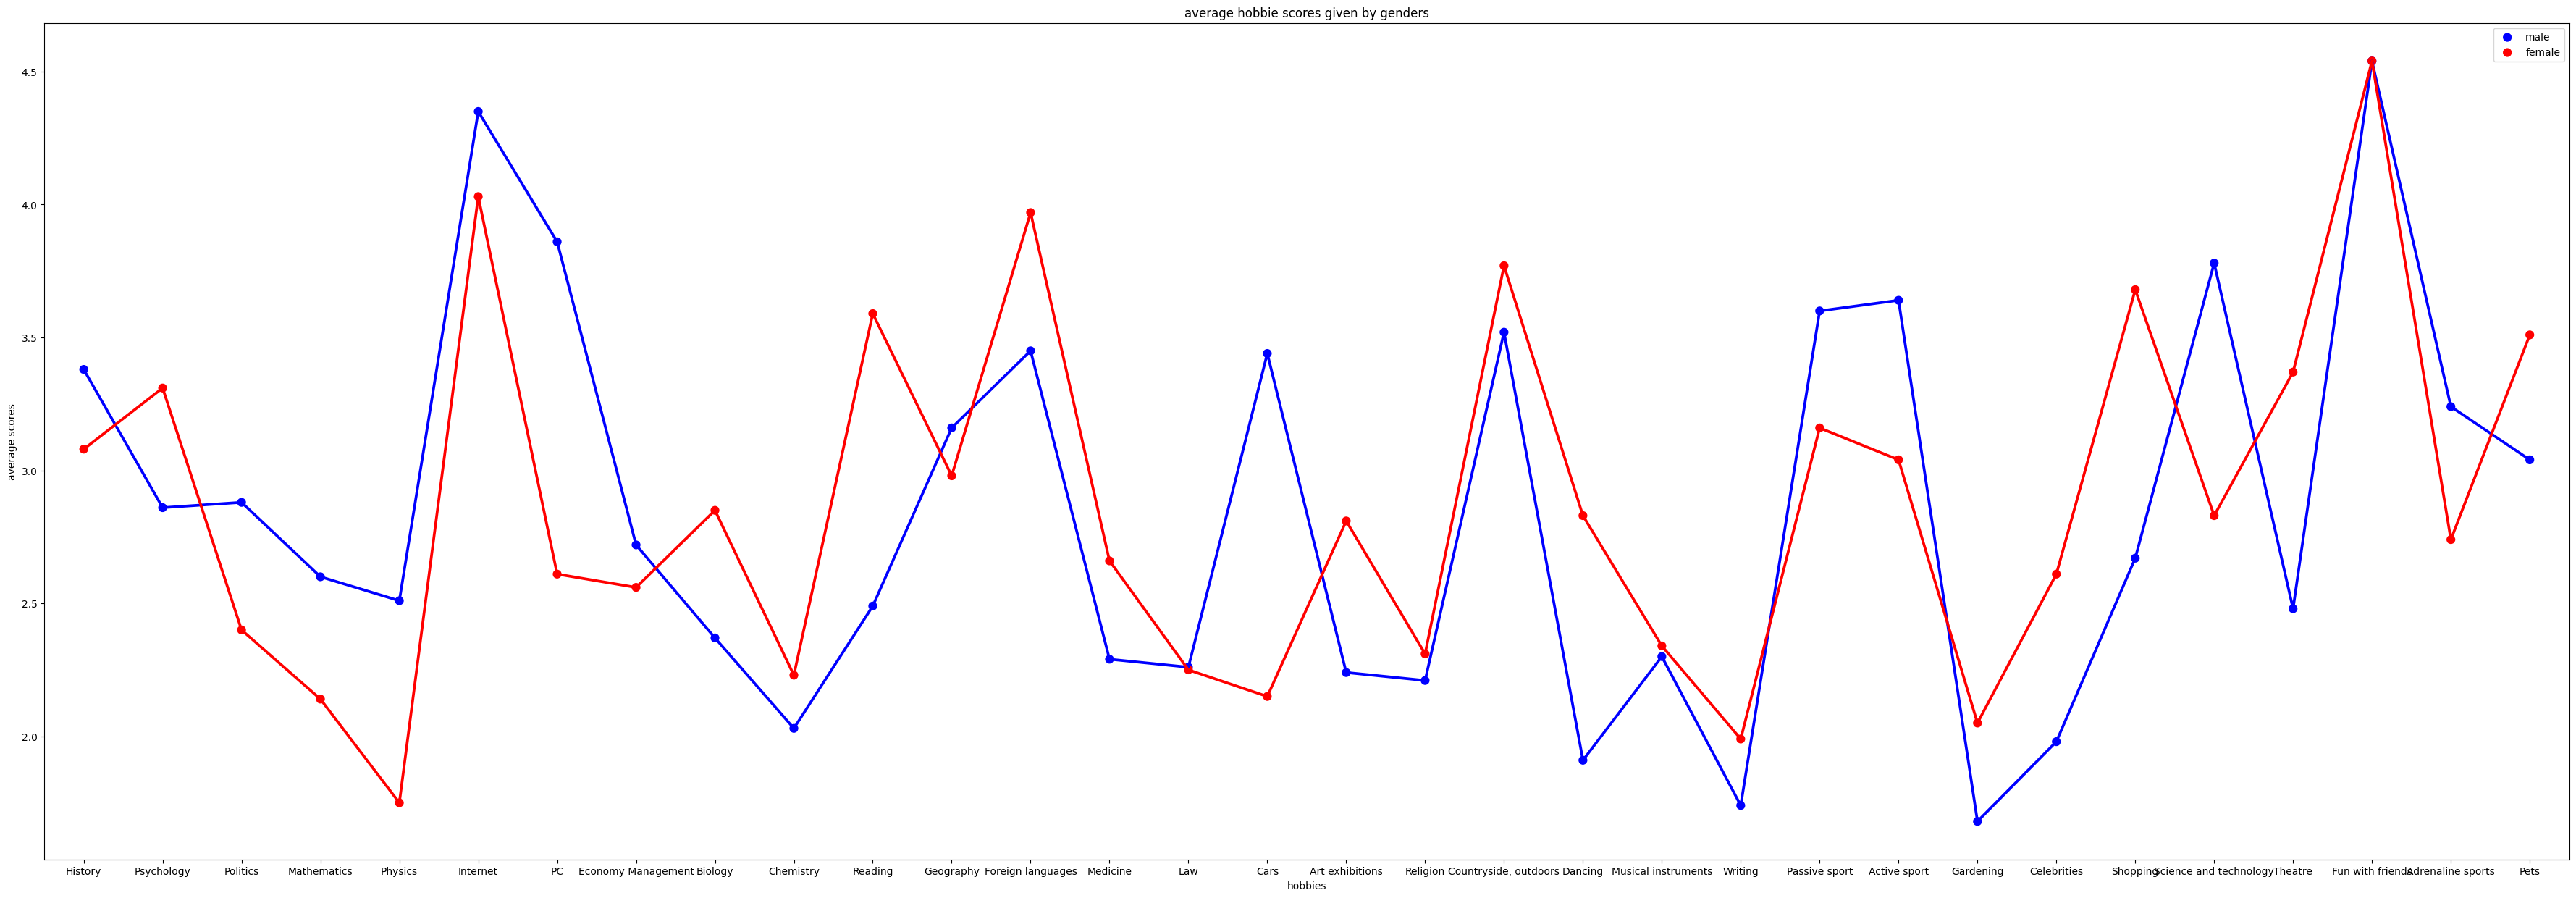

In [ ]:
f,ax1 = plt.subplots(figsize = (45,15))
sns.pointplot(x = "hobbies", y = "male", data = male_hobbies, color = "blue", label= "male")
sns.pointplot(x = "hobbies", y = "female", data = female_hobbies, color = "red", label = "female")
ax1.legend(loc = "upper right", frameon = True )
ax1.set(xlabel = "hobbies", ylabel = "average scores", title = "average hobbie scores given by genders")
plt.show()

**Вывод:** Гипотеза оказалась неверной - у мужчин и женщин не сильно различаются хобби. По графику видно, что большинство хобби совпадает для обоих полов.

# 16. Религиозные люди меньше курят.

In [ ]:
lifestyle_data = responses[['Smoking']]
lifestyle_data.reset_index(drop=True, inplace=True)
god = responses["God"]
god.reset_index(drop=True, inplace=True)
data = pd.concat([lifestyle_data, god], axis = 1)


In [ ]:
data.loc[data["God"] == 1, "God"] = 0
data.loc[data["God"] == 2, "God"] = 0
data.loc[data["God"] == 3, "God"] = 0
data.loc[data["God"] == 4, "God"] = 1
data.loc[data["God"] == 5, "God"] = 1

smoke_list = list(data.columns.values)



In [ ]:
c = len(data.loc[data["God"] == 1])
smoke_ratio1 = []
smoke_data1 = data.groupby(["Smoking"]).sum().reset_index()
smoke_list = list(smoke_data1["Smoking"].values)
for level in smoke_list:
  l = smoke_data1["God"][smoke_data1["Smoking"]==level]
  ratio1 = round(sum(l)/c, 2)
  smoke_ratio1.append(ratio1)
d1 = {"smoke_habits": smoke_list, "average_score": smoke_ratio1}
religious_habits = pd.DataFrame(d1)
religious_habits

,smoke_habits,average_score
0,current smoker,0.16
1,former smoker,0.17
2,never smoked,0.22
3,tried smoking,0.45


In [ ]:
c2 = len(data.loc[data["God"] == 0])
smoke_ratio2 = []
smoke_data2 = data.groupby(["Smoking"]).agg(lambda x: x.eq(0).sum()).reset_index()
for level in smoke_list:
  l = smoke_data2["God"][smoke_data2["Smoking"]==level]
  ratio1 = round(sum(l)/c2, 2)
  smoke_ratio2.append(ratio1)
d2 = {"smoke_habits": smoke_list, "average_score": smoke_ratio2}
not_religious_habits = pd.DataFrame(d2)
not_religious_habits

,smoke_habits,average_score
0,current smoker,0.22
1,former smoker,0.18
2,never smoked,0.19
3,tried smoking,0.41


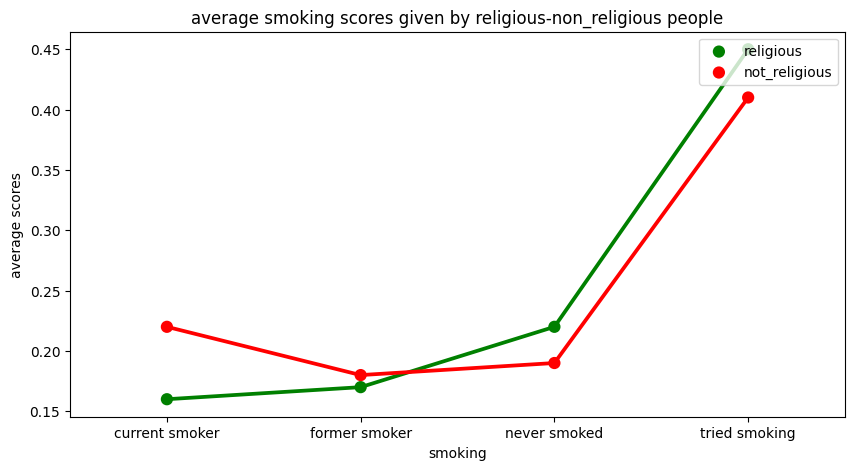

In [ ]:
f,ax1 = plt.subplots(figsize = (10,5))
sns.pointplot(x = "smoke_habits", y = "average_score", data = religious_habits, color = "green", label= "religious")
sns.pointplot(x = "smoke_habits", y = "average_score", data = not_religious_habits, color = "red", label = "not_religious")
ax1.legend(loc = "upper right", frameon = True )
ax1.set(xlabel = "smoking", ylabel = "average scores", title = "average smoking scores given by religious-non_religious people")
plt.show()

**Вывод:** гипотеза оказалась верной. Религиозные люди меньше курят. По графику видно, что больше религиозных людей пытались начать курить, но сейчас курят гораздо меньше религиозных людей, чем не религиозных.